This dataset contains information about 891 people who were on board the Titanic ship when it departed on April 15th, 1912. 
The following are the features of the dataset

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# importing data
train_data = pd.read_csv("./titanic data/train.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [131]:
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.228956,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.420397,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# checking if Ticket has some kind of grouping
train_data['Ticket'].value_counts()

CA. 2343           7
347082             7
1601               7
CA 2144            6
3101295            6
                  ..
234686             1
236171             1
347071             1
11753              1
S.C./A.4. 23567    1
Name: Ticket, Length: 681, dtype: int64

In [6]:
# dropping columns that have no effect on the outcome of the model
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [7]:
# checking whether missing values in age is random or systematic
train_data.groupby(train_data['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


Although there are some significant values in Fare and Parch for when age was missing or not, the difference in survival rate for when age was missing or not is not so much. As a result, we can treat the missing values in age as random and not sytematic. Hence we can go ahead and fill in the missing values in age with the mean age, since doing so these not bias the model towards any outcome.

In [8]:
# filling in missing age values with mean age
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are no longer missing values in the age column, but there are missing values in the Cabin and Embarked column

In [9]:
# checking if missing values in cabin in sytematic or random
train_data.groupby(train_data['Cabin'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,
False,0.666667,1.196078,35.258349,0.441176,0.436275,76.141504
True,0.299854,2.639010,28.048341,0.547307,0.365357,19.157325


Clearly, there is a higher survival rate(about 67%) for when Cabin values were not missing than when cabin values were missing(about 30%). This shows that the missing values in the Cabin column was systematic amd is a very strong indicator of whether someone survived or not.
As a result, although the missing values represent a very percentage or our dataset, we will not drop the missing values, but rather convert it to numerical values with a binary indicator to help our classification.

In [10]:
# creating a column called cabin_ind to store values for where cabin in null(0) or not(1)
train_data['Cabin_ind'] = np.where(train_data['Cabin'].isnull(), 0, 1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,0,3,male,22.000000,1,0,7.2500,NaN,S,0
1,1,1,female,38.000000,1,0,71.2833,C85,C,1
2,1,3,female,26.000000,0,0,7.9250,NaN,S,0
3,1,1,female,35.000000,1,0,53.1000,C123,S,1
4,0,3,male,35.000000,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,NaN,S,0
887,1,1,female,19.000000,0,0,30.0000,B42,S,1
888,0,3,female,29.699118,1,2,23.4500,NaN,S,0
889,1,1,male,26.000000,0,0,30.0000,C148,C,1


In [11]:
# dropping cabin column
train_data.drop('Cabin', axis=1, inplace=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_ind
0,0,3,male,22.000000,1,0,7.2500,S,0
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,1
888,0,3,female,29.699118,1,2,23.4500,S,0
889,1,1,male,26.000000,0,0,30.0000,C,1


In [12]:
# converting sex into numerical values
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_ind
0,0,3,1,22.000000,1,0,7.2500,S,0
1,1,1,0,38.000000,1,0,71.2833,C,1
2,1,3,0,26.000000,0,0,7.9250,S,0
3,1,1,0,35.000000,1,0,53.1000,S,1
4,0,3,1,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,0
887,1,1,0,19.000000,0,0,30.0000,S,1
888,0,3,0,29.699118,1,2,23.4500,S,0
889,1,1,1,26.000000,0,0,30.0000,C,1


In [13]:
# converting embarked column to numerical

dummies = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
dummies


,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [14]:
train_data = pd.concat([train_data, dummies], axis=1)
train_data.drop('Embarked', inplace=True, axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,0,1
3,1,1,0,35.000000,1,0,53.1000,1,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,0,1
887,1,1,0,19.000000,0,0,30.0000,1,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,1,0,0


In [15]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [16]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [18]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [19]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[94, 16],
       [22, 47]], dtype=int64)

In [20]:
clf_1 = DecisionTreeClassifier(criterion='entropy')
clf_1.fit(X_train, y_train)
pred_1 = clf_1.predict(X_test)
report_1 = classification_report(y_test, pred_1)
print(report_1)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



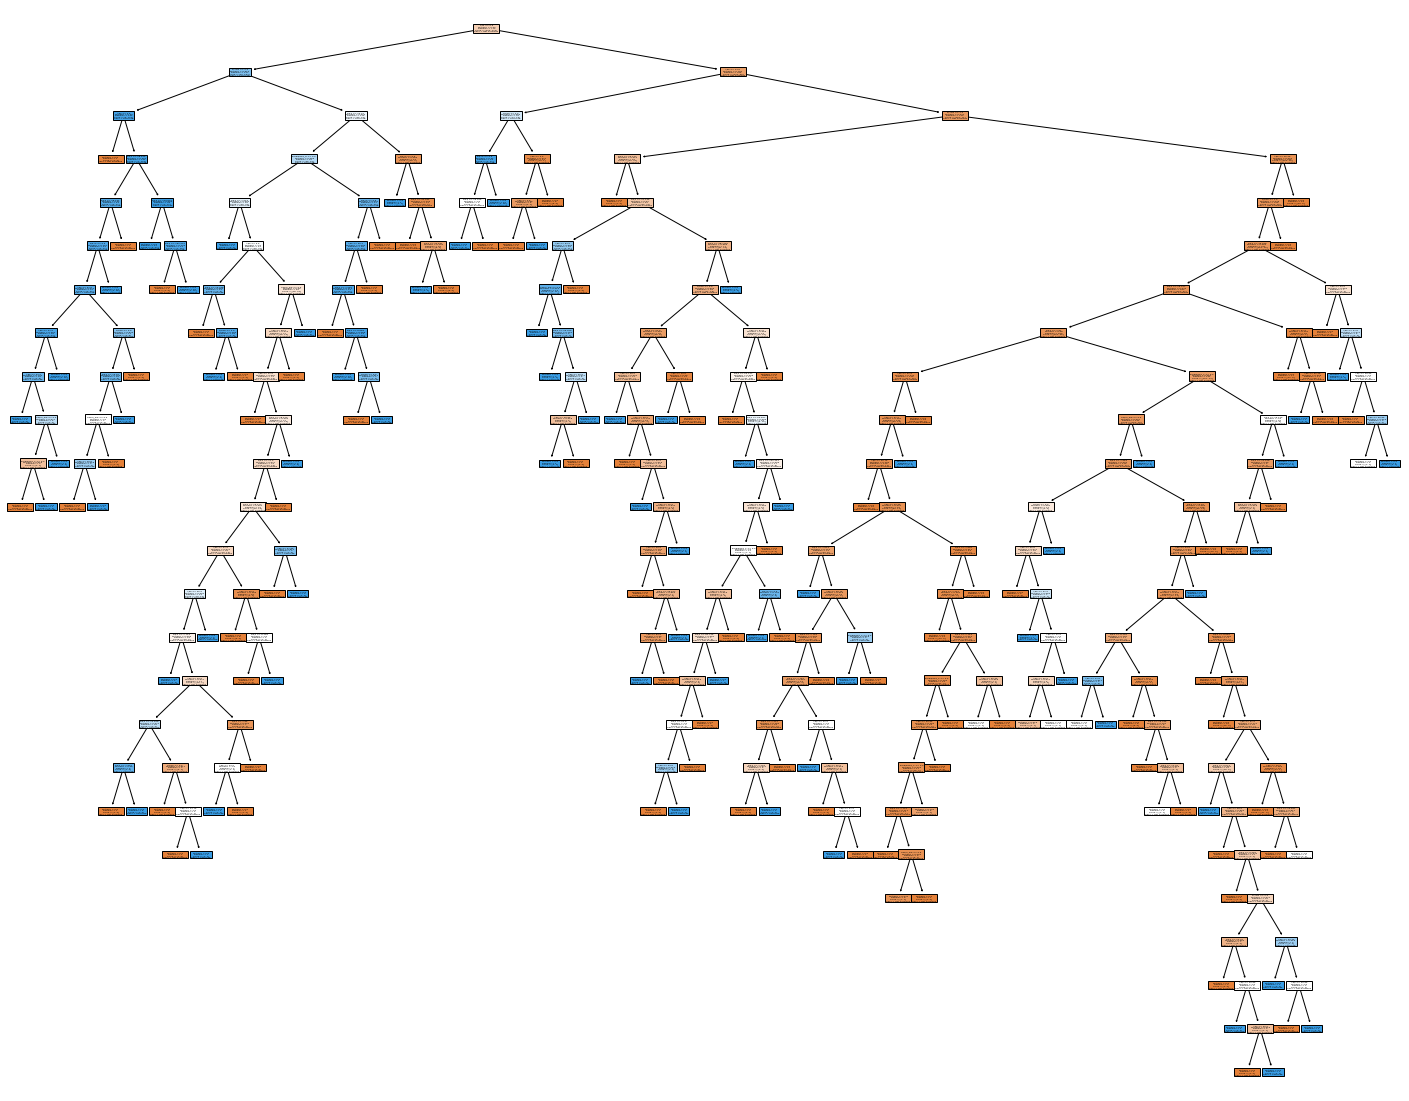

In [102]:
import matplotlib.pyplot as plt
feature_names = X.columns
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(clf_1, 
                   feature_names=feature_names,  
                   class_names=['Not Survived', 'Survived'],
                   filled=True)
plt.savefig('clf_1_tree.png')

Choosing entropy or gini does not really result in significant changes to accuracy, precision and recall.

In [21]:
clf_2 = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=2, random_state=100)
clf_2.fit(X_train, y_train)
pred_2 = clf_2.predict(X_test)
report_2 = classification_report(y_test, pred_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       110
           1       0.80      0.62      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



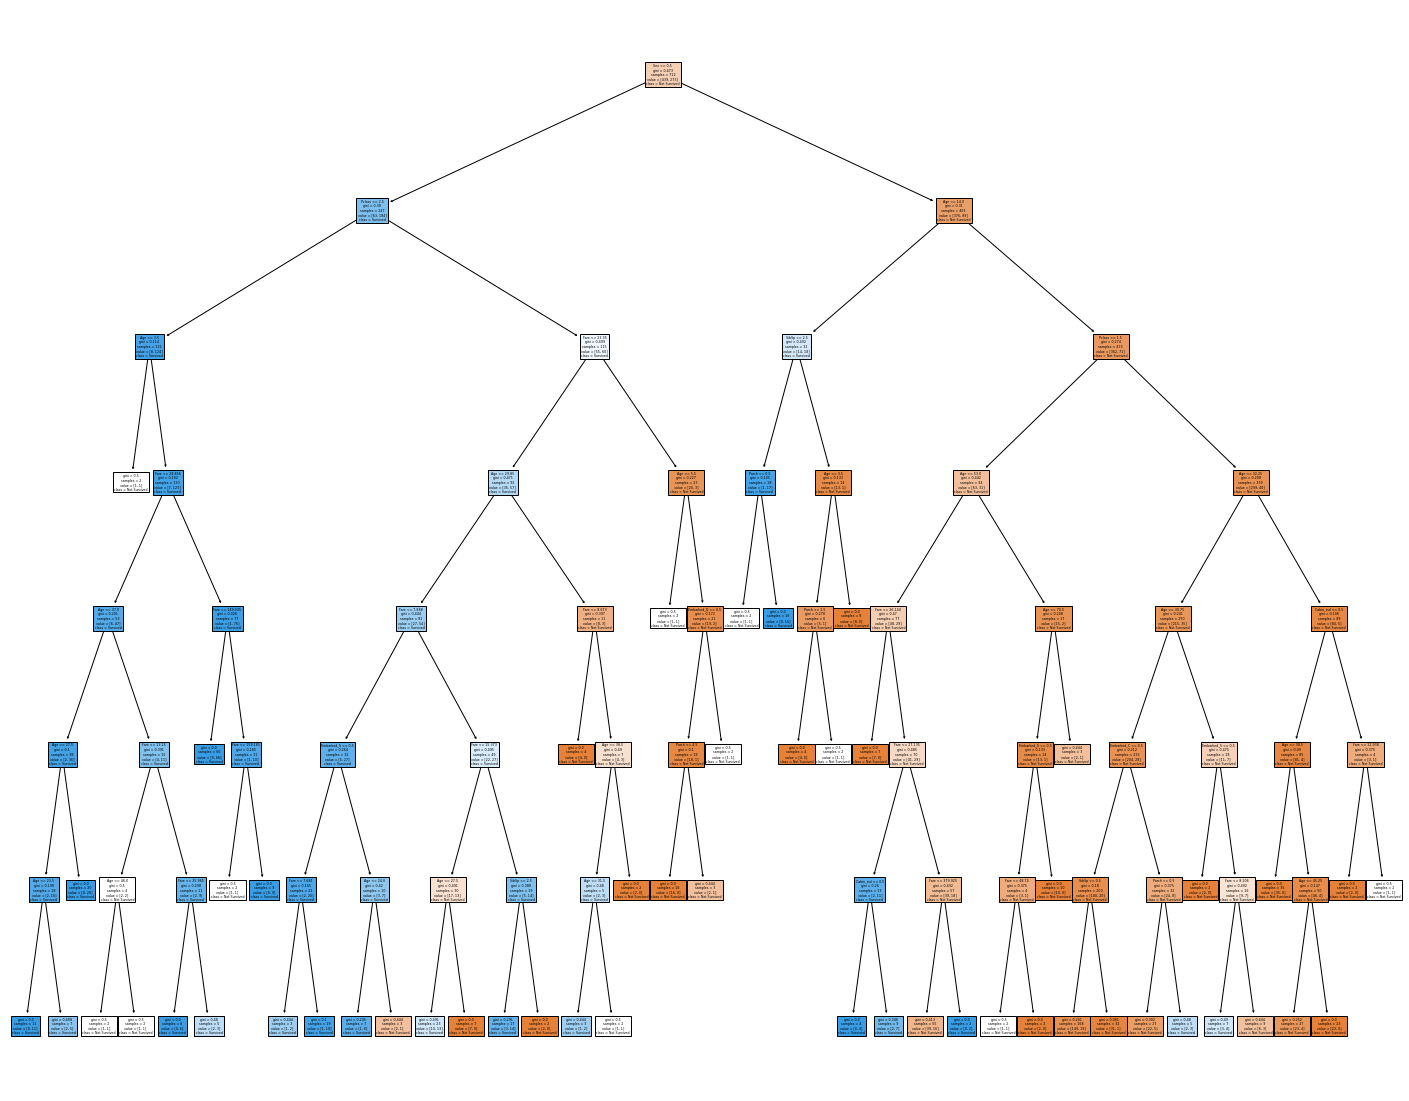

In [57]:
import matplotlib.pyplot as plt
feature_names = X.columns
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(clf_2, 
                   feature_names=feature_names,  
                   class_names=['Not Survived', 'Survived'],
                   filled=True)
plt.savefig('clf_2_tree.png')

In [54]:
clf_3 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2)
clf_3.fit(X_train, y_train)
pred_3 = clf_3.predict(X_test)
report_3 = classification_report(y_test, pred_3)
print(report_3)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



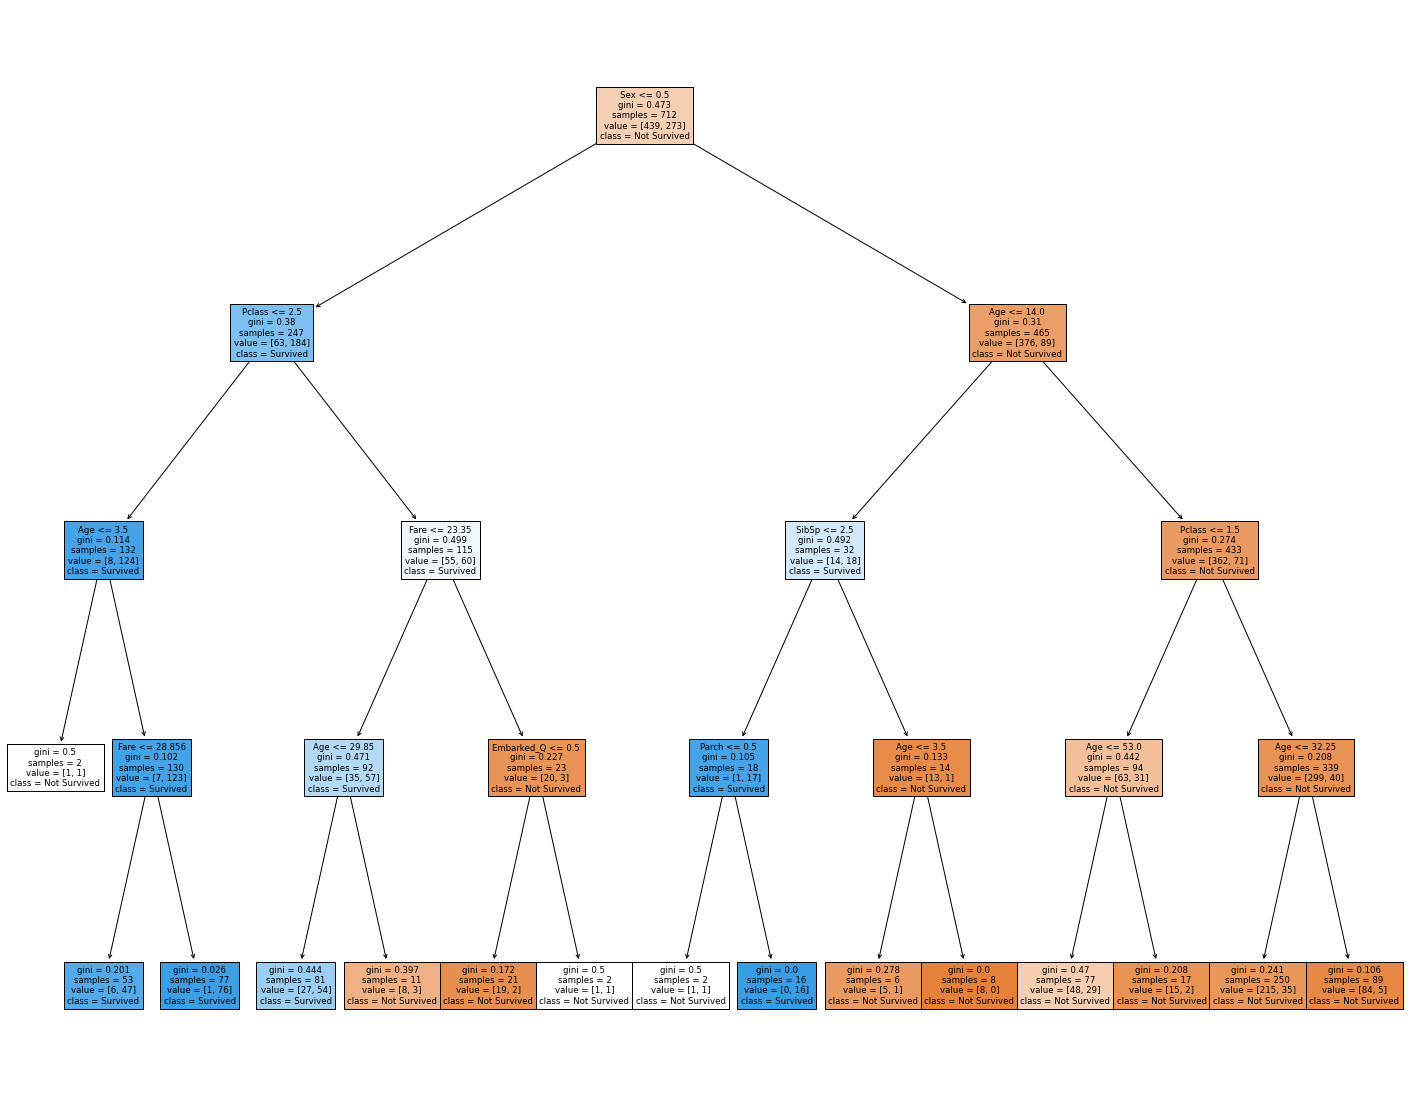

In [62]:
import matplotlib.pyplot as plt
feature_names = X.columns
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(clf_3, 
                   feature_names=feature_names,
                   class_names=['Not Survived', 'Survived'],
                   filled=True)
plt.savefig('clf_3_tree.png')

In [66]:
train_data.groupby(train_data['Sex']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_ind,Embarked_C,Embarked_Q,Embarked_S
Sex,,,,,,,,,,
0,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818,0.308917,0.232484,0.114650,0.646497
1,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893,0.185442,0.164645,0.071057,0.764298


In [98]:
clf_4 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=10)
clf_4.fit(X_train, y_train)
pred_4 = clf_4.predict(X_test)
report_4 = classification_report(y_test, pred_4)
print(report_4)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



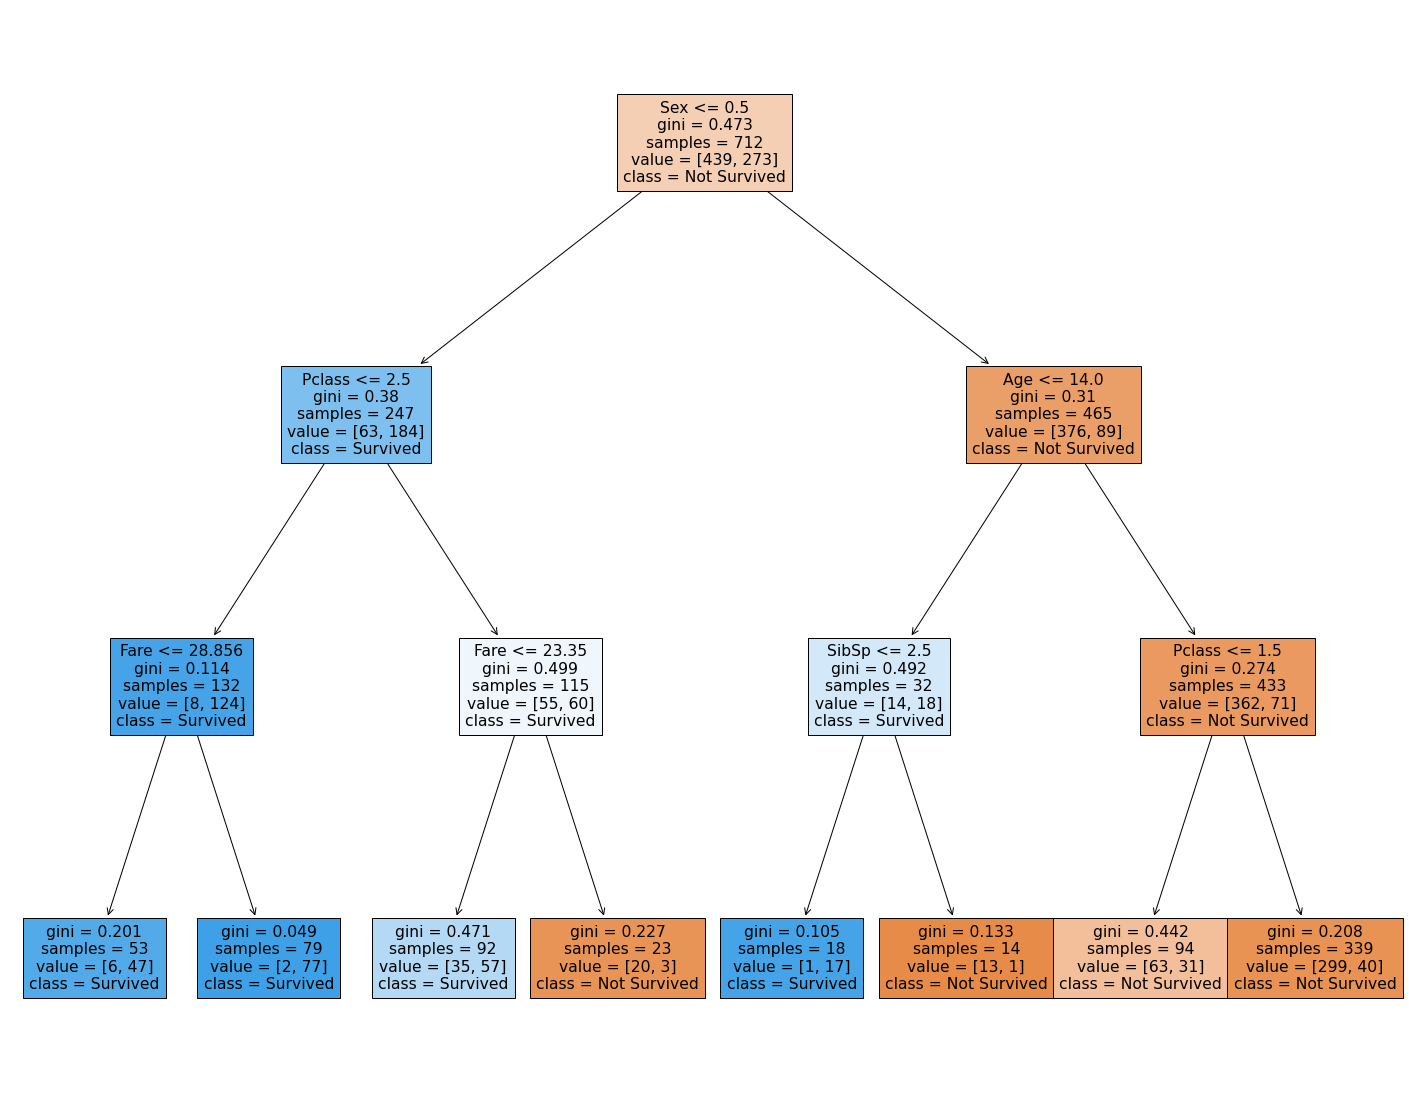

In [99]:
import matplotlib.pyplot as plt
feature_names = X.columns
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(clf_4, 
                   feature_names=feature_names,
                   class_names=['Not Survived', 'Survived'],
                   filled=True)
plt.savefig('clf_4_tree.png')

In [101]:
from sklearn.model_selection import KFold

clf_5 = DecisionTreeClassifier()
kf = KFold(shuffle = True, random_state = 1) # using default split value of 5


for train_index, val_index in kf.split(X):
    X_train, X_val =  X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    clf_5.fit(X_train, y_train)
    pred_5 = clf_5.predict(X_test)
    report_5 = classification_report(y_test, pred_5)
    print(report_5)
    


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       110
           1       0.97      0.91      0.94        69

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       110
           1       0.96      0.93      0.94        69

    accuracy                           0.96       179
   macro avg       0.96      0.95      0.95       179
weighted avg       0.96      0.96      0.96       179

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       110
           1       0.92      0.94      0.93        69

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

              preci

In [104]:

test_data = pd.read_csv("./titanic data/test.csv")
#dropping unneeded columns
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
#filling in missing data in age and cabin
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Cabin_ind'] = np.where(test_data['Cabin'].isnull(), 0, 1)
# dropping cabin column
test_data.drop('Cabin', axis=1, inplace=True)

# encoding sex feature to numerical
le = LabelEncoder()
test_data['Sex'] = le.fit_transform(test_data['Sex'])
#encoding emmbarked column to numerical
test_dummies = pd.get_dummies(test_data['Embarked'], prefix='Embarked')

test_data = pd.concat([test_data, test_dummies], axis=1)
test_data.drop('Embarked', inplace=True, axis=1)
test_data


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.50000,0,0,7.8292,0,0,1,0
1,3,0,47.00000,1,0,7.0000,0,0,0,1
2,2,1,62.00000,0,0,9.6875,0,0,1,0
3,3,1,27.00000,0,0,8.6625,0,0,0,1
4,3,0,22.00000,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0,0,0,1
414,1,0,39.00000,0,0,108.9000,1,1,0,0
415,3,1,38.50000,0,0,7.2500,0,0,0,1
416,3,1,30.27259,0,0,8.0500,0,0,0,1


In [108]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int32  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Cabin_ind   418 non-null    int32  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int32(2), int64(3), uint8(3)
memory usage: 20.9 KB


In [109]:
test_data.dropna(inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      417 non-null    int64  
 1   Sex         417 non-null    int32  
 2   Age         417 non-null    float64
 3   SibSp       417 non-null    int64  
 4   Parch       417 non-null    int64  
 5   Fare        417 non-null    float64
 6   Cabin_ind   417 non-null    int32  
 7   Embarked_C  417 non-null    uint8  
 8   Embarked_Q  417 non-null    uint8  
 9   Embarked_S  417 non-null    uint8  
dtypes: float64(2), int32(2), int64(3), uint8(3)
memory usage: 24.0 KB


In [132]:
test_predictions = clf_3.predict(test_data)
test_predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [133]:
unique_counts = np.unique(test_predictions, return_counts=True)
unique_counts

(array([0, 1], dtype=int64), array([292, 125], dtype=int64))

In [134]:
survival_rate = unique_counts[1][1]/(unique_counts[1][1]+unique_counts[1][0])
survival_rate

0.2997601918465228

In [135]:
test_predictions_1 = clf_4.predict(test_data)
test_predictions_1

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [136]:
unique_counts_1 = np.unique(test_predictions_1, return_counts=True)
unique_counts_1

(array([0, 1], dtype=int64), array([257, 160], dtype=int64))

In [137]:
survival_rate_1 = unique_counts_1[1][1]/(unique_counts_1[1][1]+unique_counts_1[1][0])
survival_rate_1

0.38369304556354916